---
# Statistics for Data Scientists (S4DS) Notebook
----

## Introduction

This notebook contains the examples from S4DS, re-implemented in Python.



### Magic commands, and imports

In [1]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd

import urllib.request
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sn

import scipy
import scipy.stats as stats
import statsmodels.robust as rb

import sklearn.linear_model as lm
import statsmodels.api as sm

import humanize as hu


D:\Anaconda3\envs\root36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [3]:
print(scipy.__version__)
print(scipy.__numpy_version__)

1.0.0
1.14.1


---
## Data Downloads

The S4DS references a number of data sets; the function below re-implements the R code to access and download these data sets.

All datasets are stored in directory `./data`

In [4]:

# ...
# Download the file from `url` and save it locally under `file_name`:
# urllib.request.urlretrieve(url, file_name)

In [5]:
PSDS_PATH = './data/'

def download_from_google_drive(id,fname,path):
    '''
    download_from_google_drive: download data files from Prac. Stats. for Data Science
    
    Downloads a data set, if not already present
    
    Arguments:
    id (string) id of a google drive file to append to google drive url
    fname (string) name of data set, used to save to local drive
    path (string) path to save file to
    
    Outputs:
    Reports if file present, or if download is needed
    
    Returns:
    None
    '''
    
    dest = PSDS_PATH+fname
    url = "https://drive.google.com/uc?export=download&id="+id
    
    my_file = Path(dest)
    if(my_file.exists()):
        print(dest+' already present')
    else:
        
        print('Downloading ',id, ' to: ',dest)
        urllib.request.urlretrieve(url, dest)
    #end if
    return None
#end download_from_google_drive

In [6]:

## Import state data
download_from_google_drive(id="0B98qpkK5EJembFc5RmVKVVJPdGc", fname='state.csv', path=PSDS_PATH)

./data/state.csv already present


In [7]:


## Airline data
download_from_google_drive(id="0B98qpkK5EJemcmZYX2VhMHBXelE", fname='dfw_airline.csv', path=PSDS_PATH)
download_from_google_drive(id="0B98qpkK5EJemMzZYZHZJaF9va0U", fname='airline_stats.csv', path=PSDS_PATH)

## Import stock data
download_from_google_drive('0B98qpkK5EJemV2htZWdhVFRMNlU', fname='sp500_px.csv', path=PSDS_PATH)
download_from_google_drive('0B98qpkK5EJemY0U0N1N6a21lUzA', fname='sp500_sym.csv', path=PSDS_PATH)

## Import KC housing tax data
download_from_google_drive('0B98qpkK5EJemck5VWkszN3F3RGM', fname='kc_tax.csv', path=PSDS_PATH)

## Import lending club loan data
download_from_google_drive('0B98qpkK5EJemRXpfa2lONlFRSms', fname='lc_loans.csv', path=PSDS_PATH)
download_from_google_drive('1J96vAqyh92VIeh7kBFm1NBfZcvx8wp2s', fname='full_train_set.csv', path=PSDS_PATH)

## Import a sample of 200 records from lending club loan data
download_from_google_drive('0B98qpkK5EJemd0JnQUtjb051dTA', fname='loan200.csv', path=PSDS_PATH)

## Import a sample of 3000 records from lending club loan data
download_from_google_drive('0B98qpkK5EJemQXYtYmJUVkdsN1U', fname='loan3000.csv', path=PSDS_PATH)


## Import a complete set of records from lending club loan data
download_from_google_drive('0B98qpkK5EJemZzdoQ2I3SWlBYzg', fname='loan_data.csv', path=PSDS_PATH)

## Import loans income data
download_from_google_drive('0B98qpkK5EJemRXVld0NSbWhYNVU', fname='loans_income.csv', path=PSDS_PATH)

## Import session_times data
download_from_google_drive('0B98qpkK5EJemOC0xMHBTTEowYzg', fname='web_page_data.csv', path=PSDS_PATH)

## Import four_sessions data
download_from_google_drive('0B98qpkK5EJemOFdZM1JsaEF0Mnc', fname='four_sessions.csv', path=PSDS_PATH)

## Import click_rate data
download_from_google_drive('0B98qpkK5EJemVHB0ZzdtUG9SeTg', fname='click_rates.csv', path=PSDS_PATH)

## Import imanishi data
download_from_google_drive('0B98qpkK5EJemZTJnUDd5Ri1vRDA', fname='imanishi_data.csv', path=PSDS_PATH)

## Import lung disease data
download_from_google_drive('0B98qpkK5EJemb25YYUFJZnZVSnM', fname='LungDisease.csv', path=PSDS_PATH)

## Import Zillow's county level ZHVI 
download_from_google_drive('0B98qpkK5EJemWGRWOEhYN1RabVk', fname='County_Zhvi_AllHomes.csv', path=PSDS_PATH)

## Import King county house sales data
download_from_google_drive('0B98qpkK5EJemVTRRN0dLakxwTmM', fname='house_sales.csv', path=PSDS_PATH)

./data/dfw_airline.csv already present
./data/airline_stats.csv already present
./data/sp500_px.csv already present
./data/sp500_sym.csv already present
./data/kc_tax.csv already present
./data/lc_loans.csv already present
./data/full_train_set.csv already present
./data/loan200.csv already present
./data/loan3000.csv already present
./data/loan_data.csv already present
./data/loans_income.csv already present
./data/web_page_data.csv already present
./data/four_sessions.csv already present
./data/click_rates.csv already present
./data/imanishi_data.csv already present
./data/LungDisease.csv already present
./data/County_Zhvi_AllHomes.csv already present
./data/house_sales.csv already present


---
## Initial Data Exploration

The initial chapters deal with a datset on population and murder rates by USA state, and different ways to define the *mean* of a sample that is robust againt outliers. 



### Load dataset from CSV file
Items to note:

* We declare data types to enable the CSV text vto be read into Unicode string variables, otherwise we would get  byte arrays, notv strings
* We skip the header row
* We define names for each 'column' of the data
* We get a ndarry of tuples as a result
* The deletechars parameter seems to have no effect

In [8]:
murder = np.genfromtxt(PSDS_PATH+'state.csv', delimiter=',', deletechars='"', \
                       dtype=['U15','i4','f4','U15'], encoding='ascii', skip_header=1, names=['Name', 'Pop', 'MR', 'Code'])

Investigate the data

In [9]:
murder[-5:]

array([('"Virginia"', 8001024, 4.1, '"VA"'),
       ('"Washington"', 6724540, 2.5, '"WA"'),
       ('"West Virginia"', 1852994, 4. , '"WV"'),
       ('"Wisconsin"', 5686986, 2.9, '"WI"'),
       ('"Wyoming"',  563626, 2.7, '"WY"')],
      dtype=[('Name', '<U15'), ('Pop', '<i4'), ('MR', '<f4'), ('Code', '<U15')])

In [10]:
murder['Name'][0:10]

array(['"Alabama"', '"Alaska"', '"Arizona"', '"Arkansas"', '"California"',
       '"Colorado"', '"Connecticut"', '"Delaware"', '"Florida"',
       '"Georgia"'], dtype='<U15')

In [11]:
murder['Pop']

array([ 4779736,   710231,  6392017,  2915918, 37253956,  5029196,
        3574097,   897934, 18801310,  9687653,  1360301,  1567582,
       12830632,  6483802,  3046355,  2853118,  4339367,  4533372,
        1328361,  5773552,  6547629,  9883640,  5303925,  2967297,
        5988927,   989415,  1826341,  2700551,  1316470,  8791894,
        2059179, 19378102,  9535483,   672591, 11536504,  3751351,
        3831074, 12702379,  1052567,  4625364,   814180,  6346105,
       25145561,  2763885,   625741,  8001024,  6724540,  1852994,
        5686986,   563626])

#### Show a scatter plot of population against murder rate
There appears (superficially) to be low, if any, correlation

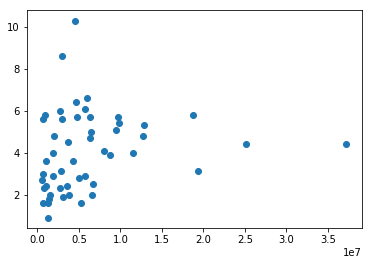

In [12]:
plt.scatter(x=murder['Pop'], y=murder['MR']);


### Generate some descriptive statistics

In [13]:
stats.describe(murder['Pop'])

DescribeResult(nobs=50, minmax=(563626, 37253956), mean=6162876.3, variance=46898327373394.445, skewness=2.5626855429174094, kurtosis=7.756338866239435)

### Investigate the mean value with outliers trimmed

We use humanize to turn large integers into more readable values

In [14]:
stats.trim_mean(murder['Pop'], 0.1)

4783697.125

In [15]:
print(hu.intword(6162876))
print(hu.intword( stats.trim_mean(murder['Pop'], 0.1)))



6.2 million
4.8 million


### Investigate the trend of the trimmed mean as more and more outliers are removed

In [16]:
[hu.intword(stats.trim_mean(murder['Pop'], x/100.0)) for x in range(1,31)]

['6.2 million',
 '5.6 million',
 '5.6 million',
 '5.3 million',
 '5.3 million',
 '5.1 million',
 '5.1 million',
 '4.9 million',
 '4.9 million',
 '4.8 million',
 '4.8 million',
 '4.7 million',
 '4.7 million',
 '4.6 million',
 '4.6 million',
 '4.5 million',
 '4.5 million',
 '4.5 million',
 '4.5 million',
 '4.4 million',
 '4.4 million',
 '4.4 million',
 '4.4 million',
 '4.3 million',
 '4.3 million',
 '4.3 million',
 '4.3 million',
 '4.4 million',
 '4.4 million',
 '4.4 million']

#### Show a scatter plot showing trimmed mean behaviour, as trim value increases 

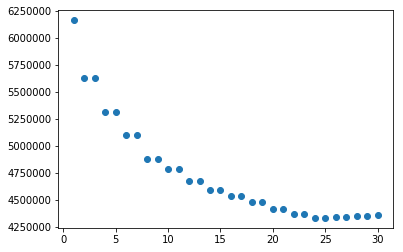

In [17]:
plt.scatter(x=range(1,31), y= [stats.trim_mean(murder['Pop'], x/100.0) for x in range(1,31)]);

#### Compare median and trimmed mean

Note that numpy is used to get median (no such scipy.stats function?)

In [18]:
stats.trim_mean(murder['Pop'], 0.1) 

4783697.125

In [19]:
hu.intword(np.median(murder['Pop']))

'4.4 million'

#### Show histogram of population and murder rate 

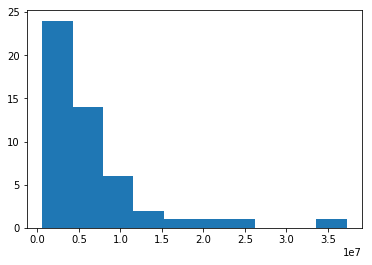

In [20]:
plt.hist(murder['Pop'], bins=10);

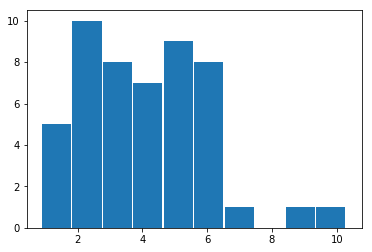

In [21]:
plt.hist(murder['MR'], bins=10, width=0.9);

#### get the confidence interval for the median

Not really relevant here as we have the whole population, not a sample

In [22]:
hu.intword(stats.mstats.median_cihs(murder['Pop'])[0]), hu.intword(stats.mstats.median_cihs(murder['Pop'])[1])

('2.9 million', '5.8 million')

Improve the histogram, by using Millions as the X Axis unit

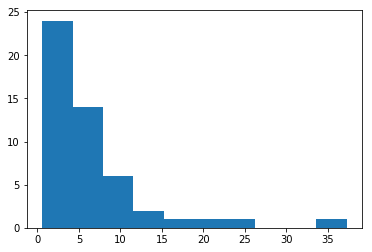

In [23]:
plt.hist(murder['Pop']/1_000_000);

#### Show boxplots

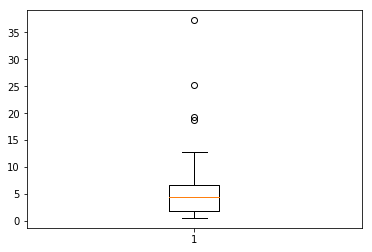

In [24]:
plt.boxplot(murder['Pop']/1_000_000);

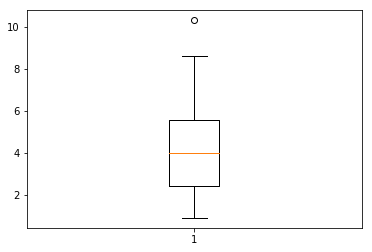

In [25]:
plt.boxplot(murder['MR']);

In [26]:
np.median(murder['Pop'])

4436369.5

### Show the values for various descriptions of the spread of the data

The scipy.stats.describe method gives the unbiased estimate of the variance (divide by $\sqrt ( n - 1 )$, numpy.std gives the biased estimate (divide by $\sqrt ( n )$ )

In [27]:
x = stats.describe(murder['Pop'])
x

DescribeResult(nobs=50, minmax=(563626, 37253956), mean=6162876.3, variance=46898327373394.445, skewness=2.5626855429174094, kurtosis=7.756338866239435)

In [28]:
x.variance

46898327373394.445

In [29]:
std = np.sqrt(x.variance)

In [30]:
std

6848235.347401142

In [31]:
np.std(murder['Pop'])*np.sqrt(50/49)

6848235.347401144

### IQR is the 25%-75% range

In [32]:
stats.iqr(murder['Pop'])

4847308.0

### MAD is the median absolute deviation

In [33]:
rb.mad(murder['Pop'])


3849876.1459979336

---
## Bar Charts and Categorical Data

In [34]:
delays = np.genfromtxt(PSDS_PATH+'dfw_airline.csv', delimiter=',', deletechars='"', \
                       dtype=['f4','f4','f4','f4', 'f4'], encoding='ascii', skip_header=0, names=True)

In [35]:
delays


array((64263.16, 84856.5, 11235.42, 343.15, 118427.82),
      dtype=[('Carrier', '<f4'), ('ATC', '<f4'), ('Weather', '<f4'), ('Security', '<f4'), ('Inbound', '<f4')])

6


Text(0.5,1,'Causes of delays, DFW Airport')

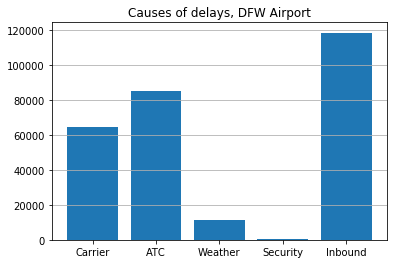

In [36]:
fig, ax = plt.subplots()
ax.yaxis.grid(True)

n_causes = len(delays.dtype.names)+1
print(n_causes)
x_bar = list(range(0,n_causes))
y_bar = delays.tolist()
plt.bar([1,2,3,4,5], y_bar, tick_label=delays.dtype.names)
plt.title('Causes of delays, DFW Airport')

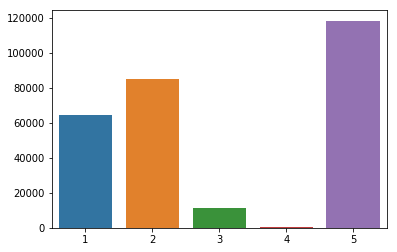

In [37]:
sn.barplot([1,2,3,4,5], y_bar)

In [38]:
delays_df = pd.read_csv(PSDS_PATH+'dfw_airline.csv')

In [39]:
delays_df


,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


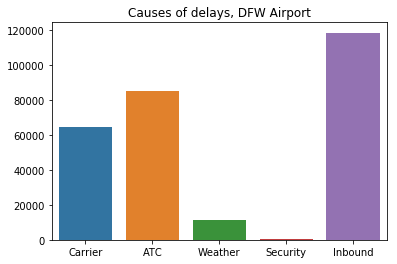

In [40]:
plt.title('Causes of delays, DFW Airport')
sn.barplot(data=delays_df)

---
## Correlation Analysis

### Read in csv database of stock prices

In [41]:
stock_df = pd.read_csv(PSDS_PATH+'sp500_px.csv')

Explore data

In [42]:
stock_df.head()

,Unnamed: 0,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


### Compute correlation of telecoms stocks

In [43]:
stock_df[['T', 'CTL', 'FTR', 'VZ', 'LVLT']].head()

,T,CTL,FTR,VZ,LVLT
0,-0.216268,-0.463919,0.000000,-0.064076,0.0
1,0.096119,0.173973,0.014497,0.149513,0.0
2,0.072089,0.086986,0.028998,0.085437,0.0
3,0.000000,0.000000,-0.028997,0.106797,0.0
4,-0.048059,0.289952,0.028998,-0.106792,0.0


Get name of the first column, then explore the datatype of column 0

In [44]:
stock_df.columns.tolist()

col1 = stock_df.columns.tolist()[0]

In [45]:
stock_df[col1].head()

0    1993-01-29
1    1993-02-01
2    1993-02-02
3    1993-02-03
4    1993-02-04
Name: Unnamed: 0, dtype: object

In [46]:
stock_df[col1][0]

'1993-01-29'

Change the first column name to a shorter name

In [47]:
stock_df.rename(columns={col1:'Date'}, inplace=True);

In [48]:
stock_df.head()

,Date,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


Change the Date column to real datetime value, not just strings

In [49]:
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

In [50]:
stock_df.head()

,Date,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
0,1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1,1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
2,1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
3,1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
4,1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


Show the first datetime value

In [51]:
stock_df['Date'][0]

Timestamp('1993-01-29 00:00:00')

### Explore communications stocks (LVLT is zero for some initial period)

In [52]:
stock_df[['T', 'CTL', 'FTR', 'VZ', 'LVLT']].head()

,T,CTL,FTR,VZ,LVLT
0,-0.216268,-0.463919,0.000000,-0.064076,0.0
1,0.096119,0.173973,0.014497,0.149513,0.0
2,0.072089,0.086986,0.028998,0.085437,0.0
3,0.000000,0.000000,-0.028997,0.106797,0.0
4,-0.048059,0.289952,0.028998,-0.106792,0.0


### Show a scatter plot of T and VZ stocks (second with reduced overwritting of symbols)

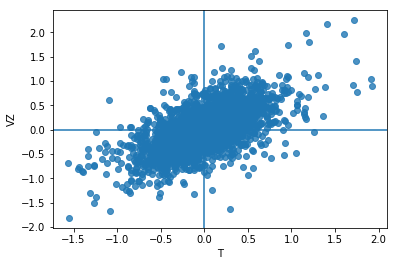

In [53]:
sn.regplot(x=stock_df['T'], y=stock_df['VZ'], fit_reg=False)
plt.axvline(x=0)
plt.axhline(y=0)

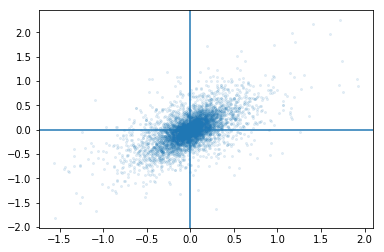

In [54]:
plt.plot('T', 'VZ', data=stock_df, marker='o', markersize=2, alpha=0.1, linestyle='')
plt.axvline(x=0)
plt.axhline(y=0)

### show correlation of comms stocks against each other

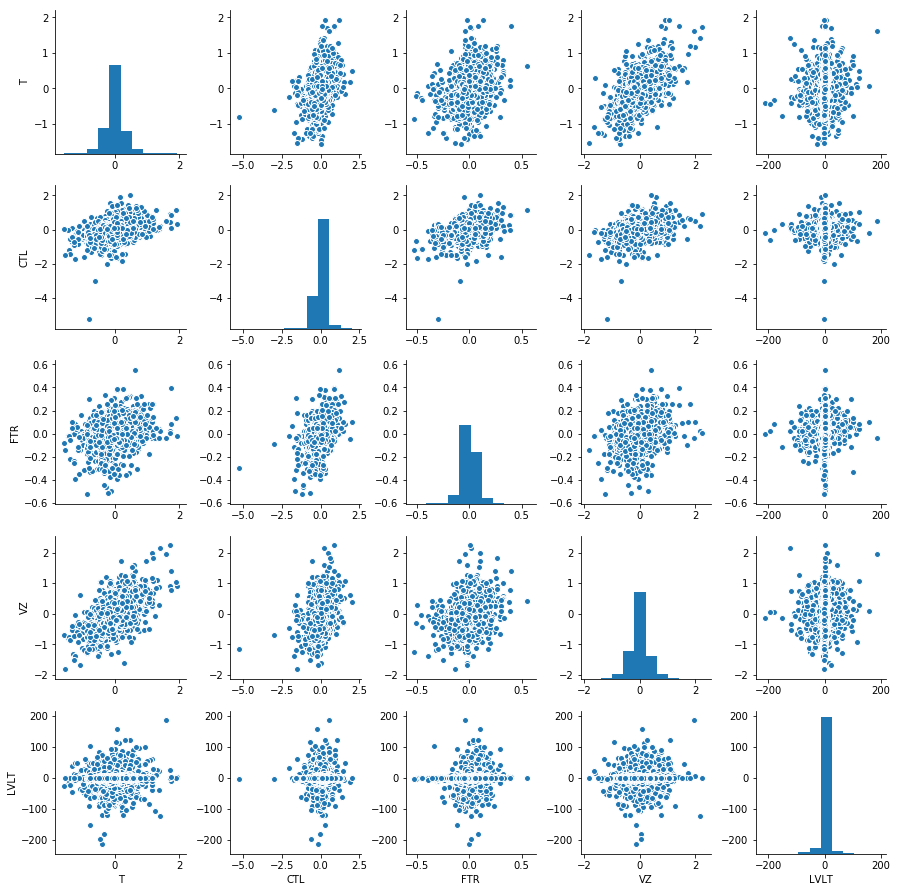

In [55]:
comms_df = stock_df[['T', 'CTL', 'FTR', 'VZ', 'LVLT']]

sn.pairplot(comms_df)

###  Note that this example is flawed; LVLT was initially zero for a period of time, so correlation will be low by definition

In [56]:
corr = comms_df.corr()

In [57]:
corr

,T,CTL,FTR,VZ,LVLT
T,1.000000,0.405853,0.283279,0.617035,0.061545
CTL,0.405853,1.000000,0.377644,0.385752,0.054534
FTR,0.283279,0.377644,1.000000,0.289295,0.067313
VZ,0.617035,0.385752,0.289295,1.000000,0.045919
LVLT,0.061545,0.054534,0.067313,0.045919,1.000000


### Now show some visualizations of the correlation between stocks

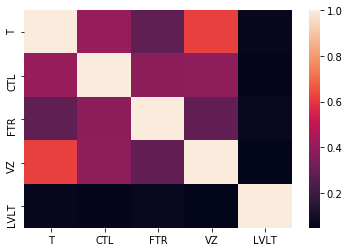

In [58]:
sn.heatmap(corr)

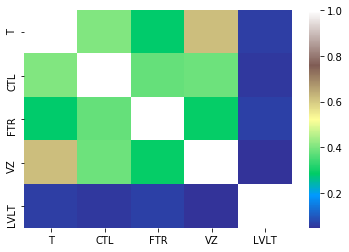

In [59]:
sn.heatmap(corr, cmap='terrain')

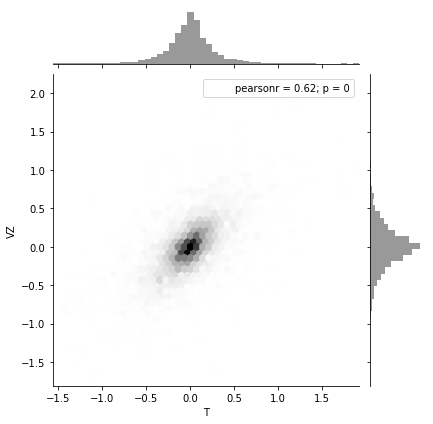

In [60]:
sn.jointplot(x=stock_df['T'], y=stock_df['VZ'], kind='hex', alpha=1.0, color='k')

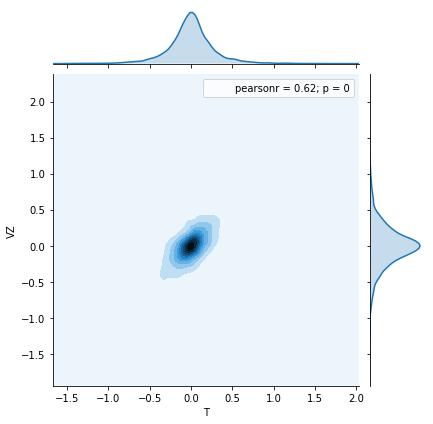

In [61]:
sn.jointplot(x=stock_df['T'], y=stock_df['VZ'], kind='kde', alpha=1.0)


In [62]:
stock_df.columns

Index(['Date', 'ADS', 'CA', 'MSFT', 'RHT', 'CTSH', 'CSC', 'EMC', 'IBM', 'XRX',
       ...
       'WAT', 'ALXN', 'AMGN', 'BXLT', 'BIIB', 'CELG', 'GILD', 'REGN', 'VRTX',
       'HSIC'],
      dtype='object', length=518)

---
## Additonal multi-variable examples

In [63]:
tax_df = pd.read_csv(PSDS_PATH+'kc_tax.csv')

In [64]:
print(plt.style.available)

['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', '_classic_test']


In [65]:
tax_df.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [66]:
tax_df['TaxAssessedValue'].isnull().sum()

738

In [67]:
tax_df['ZipCode'].isnull().sum()

30349

In [68]:
tax_nozip = tax_df[tax_df['ZipCode'].isnull()]

In [69]:
tax_nozip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
14,196000.0,1152,NaN
19,420000.0,1470,NaN
32,669000.0,3660,NaN
41,1261000.0,3060,NaN
56,688000.0,3420,NaN


In [70]:
tax_goodzip = tax_df[tax_df['ZipCode'].notnull()]

In [71]:
tax_goodzip.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [72]:
tax_df.tail()

,TaxAssessedValue,SqFtTotLiving,ZipCode
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0
498248,286000.0,1310,98056.0


Turn ZIP codes to integers

In [73]:
tax_goodzip2 = tax_goodzip.copy()
tax_goodzip2['ZipCode'] = tax_goodzip2['ZipCode'].astype(int)

In [74]:
tax_goodzip2['ZipCode'].isnull().sum()

0

Strip out very small or very large houses, and very expensive

In [75]:
tax_normalized_df = tax_df[(tax_df['TaxAssessedValue']<750_000) & (tax_df['SqFtTotLiving']>100) & (tax_df['SqFtTotLiving']<3_500)]

In [76]:
tax_normalized_df.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


In [77]:
tax_normalized_df.tail()

,TaxAssessedValue,SqFtTotLiving,ZipCode
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0
498248,286000.0,1310,98056.0


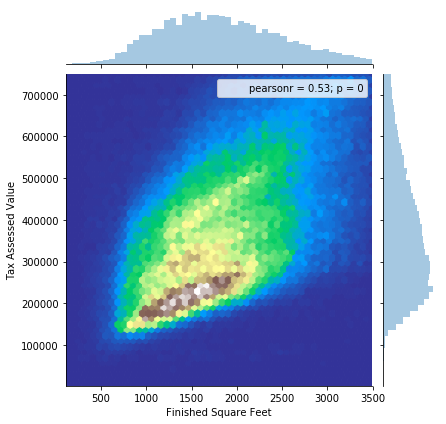

In [78]:
hex_plot = (sn.jointplot(x='SqFtTotLiving', y='TaxAssessedValue', kind='hex', data=tax_normalized_df, cmap='terrain').\
            set_axis_labels("Finished Square Feet", "Tax Assessed Value"))

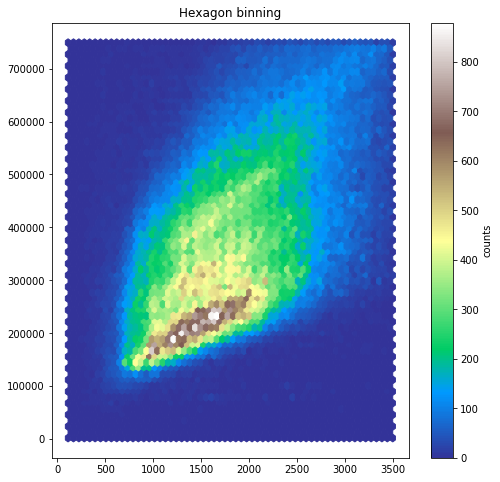

In [79]:
fig, ax = plt.subplots(figsize=(8,8))


hb = ax.hexbin(x='SqFtTotLiving', y='TaxAssessedValue', data=tax_normalized_df, gridsize=60, cmap='terrain')

ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

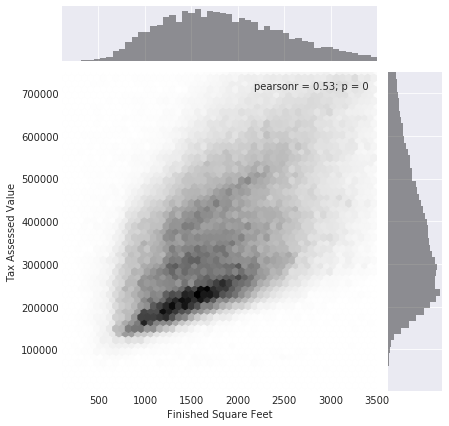

In [80]:
with sn.axes_style("darkgrid"):
    hex_plot = (sn.jointplot(x='SqFtTotLiving', y='TaxAssessedValue', kind='hex', data=tax_normalized_df, color='k').\
            set_axis_labels("Finished Square Feet", "Tax Assessed Value"))

Note:  the seaborn kde plot takes some time to run. Hex-binning and/or 2D histograms seem to bring out the details better.

In [81]:
y = tax_normalized_df['TaxAssessedValue']
x = tax_normalized_df['SqFtTotLiving']

#sn.kdeplot(x,y)

In [82]:
sn.__version__

'0.8.1'

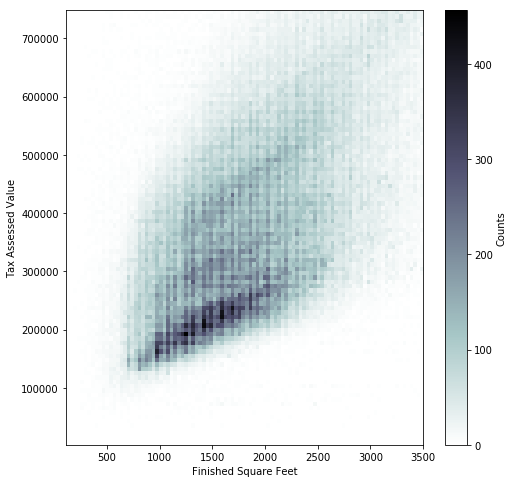

In [83]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
plt.hist2d(x, y, (100, 100), cmap=plt.cm.bone_r)
cb = plt.colorbar()
cb.set_label('Counts')

Contour plots (as opposed to KDE plots) just add noise to the 2D histogram (in my view).

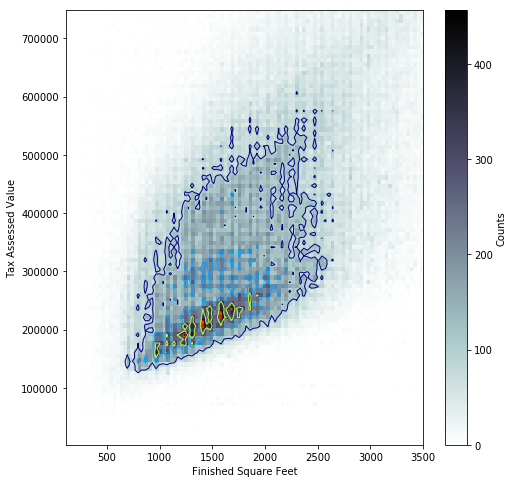

In [84]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlabel('Finished Square Feet')
ax.set_ylabel('Tax Assessed Value')
counts,xbins,ybins,image = plt.hist2d(x, y, (100, 100), cmap=plt.cm.bone_r)
cb = plt.colorbar()
cb.set_label('Counts')

plt.contour(counts.transpose(),extent=[xbins[0],xbins[-1],ybins[0],ybins[-1]],
    linewidths=1, cmap = plt.cm.jet, levels = [100, 200, 300, 400, 450])

### Box plots and Violin Plots

In [85]:
airline_df = pd.read_csv(PSDS_PATH+'airline_stats.csv')

In [86]:
airline_df.head()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
0,8.153226,1.971774,0.762097,American
1,5.959924,3.706107,1.585878,American
2,7.157270,2.706231,2.026706,American
3,12.100000,11.033333,0.000000,American
4,7.333333,3.365591,1.774194,American


In [87]:
airline_df.tail()

,pct_carrier_delay,pct_atc_delay,pct_weather_delay,airline
33463,6.186422,8.798491,1.651940,Southwest
33464,9.522167,3.591133,0.261084,Southwest
33465,9.164179,2.664179,0.343284,Southwest
33466,5.152293,1.964520,0.122817,Southwest
33467,3.964393,1.700479,0.019449,Southwest


In [88]:
airline_df.airline.unique()

array(['American', 'Alaska', 'Jet Blue', 'Delta', 'United', 'Southwest'],
      dtype=object)

Text(0,0.5,'Per Cent Flights Delayed')

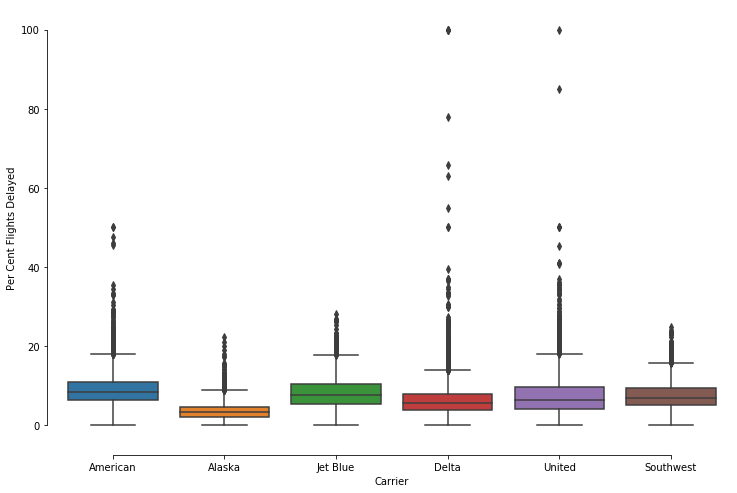

In [89]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sn.boxplot(x='airline', y='pct_carrier_delay', data=airline_df)
sn.despine(offset=10, trim=True)
ax.set_xlabel('Carrier')
ax.set_ylabel('Per Cent Flights Delayed')

Text(0,0.5,'Per Cent Flights Delayed')

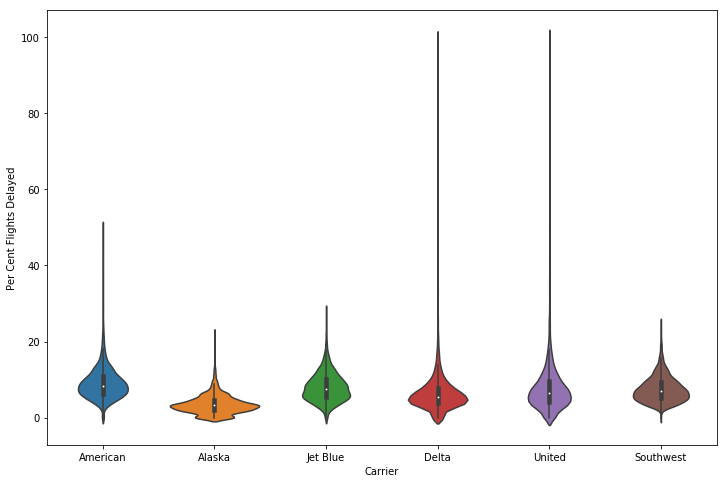

In [90]:
fig, ax = plt.subplots(figsize=(12,8))

ax = sn.violinplot(x='airline', y='pct_carrier_delay', data=airline_df)
ax.set_xlabel('Carrier')
ax.set_ylabel('Per Cent Flights Delayed')

---
## Sampling


In [91]:
lending_df = pd.read_csv(PSDS_PATH+'loan_data.csv')

In [92]:
lending_df.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [93]:
lending_df.tail()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
45337,45338,Fully Paid,8000,36 months,72000,18.97,4.57850,9725,58.2,credit_card,...,1,0,9,4.2,paid off,8,credit_card,RENT,> 1 Year,0.35
45338,45339,Fully Paid,2000,36 months,25200,13.24,3.20333,4925,40.7,wedding,...,0,1,13,4.2,paid off,3,other,MORTGAGE,> 1 Year,0.50
45339,45340,Fully Paid,4375,36 months,20000,7.95,9.98460,6574,73.0,debt_consolidation,...,1,1,8,2.4,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.55
45340,45341,Fully Paid,8000,36 months,48000,26.91,6.45250,10303,32.4,debt_consolidation,...,1,1,10,5.2,paid off,1,debt_consolidation,MORTGAGE,> 1 Year,0.65
45341,45342,Fully Paid,35000,60 months,100000,7.82,11.87150,16676,91.6,debt_consolidation,...,0,1,13,0.4,paid off,9,debt_consolidation,MORTGAGE,> 1 Year,0.50


In [94]:
income = lending_df['annual_inc']

In [95]:
income.max()

7141778

In [96]:
income.head()

0     30000
1     40000
2     15000
3     30000
4    100000
Name: annual_inc, dtype: int64

Show the histogram of income values < 200,000

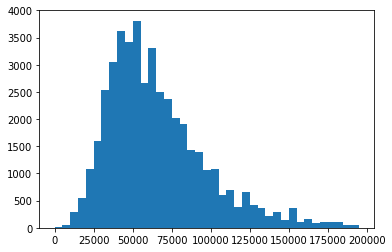

In [97]:
plt.hist(income, bins=range(0,200_000, 5_000));

Show the number of values, truncate to incomes below 200,000, and show that size.

In [98]:
income.size

45342

In [99]:
income_trunc = lending_df[lending_df['annual_inc']<200_001]['annual_inc']

In [100]:
income_trunc.size


44748

### Increasing sample sizes converge to mean

Show histogram of truncated income values to show distinctly non-normal (long right tail)

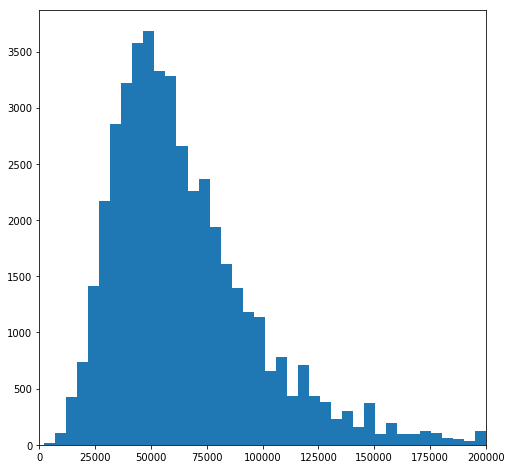

In [101]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,200_000)
plt.hist(income_trunc, bins=40);

Show a histogram of a sample of 1,000 values. Still a large spread.

In [102]:
in_1000 = income_trunc.sample(n=1000)

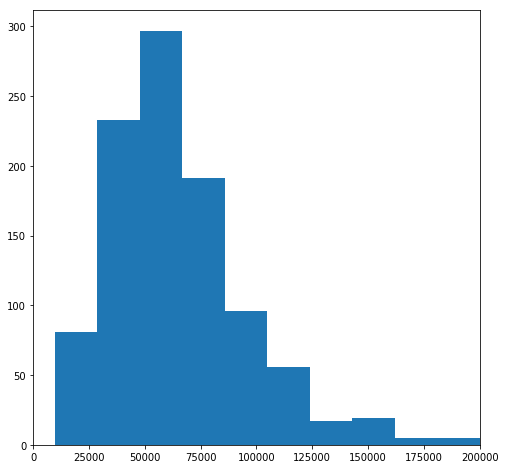

In [103]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,200_000)
plt.hist(in_1000);

In [104]:
income_trunc.mean()

64910.84573612228

Now take 1,000 sample of five values; spread is smaller.

In [105]:
five_mean = [income_trunc.sample(n=5).mean() for i in range(0,1000)]

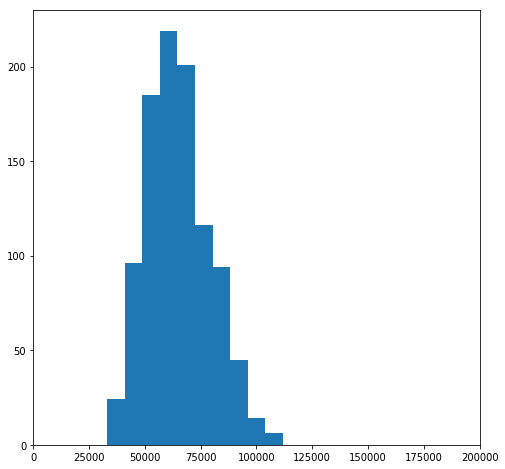

In [106]:
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,200_000)
plt.hist(five_mean);

In [107]:
np.mean(five_mean)


65054.339799999994

Now take 1,000 samples of twetny values;  this now looks more normal.

(array([  7.,  28.,  93., 209., 217., 206., 143.,  68.,  21.,   8.]),
 array([45056.55 , 49344.315, 53632.08 , 57919.845, 62207.61 , 66495.375,
        70783.14 , 75070.905, 79358.67 , 83646.435, 87934.2  ]),
 <a list of 10 Patch objects>)

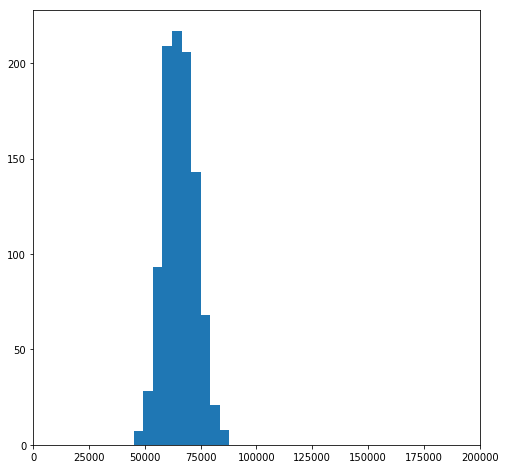

In [108]:
twenty_mean = [income_trunc.sample(n=20).mean() for i in range(0,1000)]
fig, ax = plt.subplots(figsize=(8,8))

ax.set_xlim(0,200_000)
plt.hist(twenty_mean)


---
## Bootstrapping resampling

In [109]:
print(income_trunc.size)

44748


In [110]:
print(income_trunc.mean())
true_mean = income_trunc.mean()

64910.84573612228


In [111]:
print(income_trunc.std())

32418.797861011844


In [112]:
sample_size = 100
my_sample = income_trunc.sample(n=sample_size, replace=False)
sample_mean = my_sample.mean()
print('True Mean: ', true_mean, 'Sample Mean: ', sample_mean)

True Mean:  64910.84573612228 Sample Mean:  66747.94


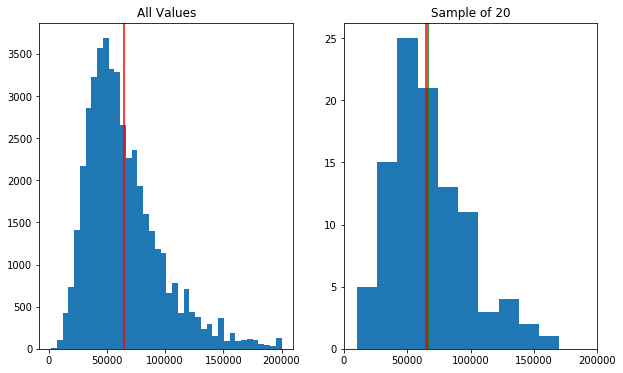

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))


ax[0].hist(income_trunc, bins=40)
ax[0].set_title('All Values')
ax[0].axvline(x=income_trunc.mean(), color='r')


ax[1].hist(my_sample, bins=10)
ax[1].set_title('Sample of 20')
ax[1].axvline(x=sample_mean, color='g')
ax[1].axvline(x=true_mean, color='r')
ax[1].set_xlim((0,200_000))
ax[1].set_xticks(range(0,200_001,50_000))

plt.show()


Now generate 1000 resample of our original sample, compute the 90% spread, and show that range around our sample mean

In [114]:
resamples = [my_sample.sample(n=sample_size, replace=True).mean() for i in range(1,1000)]

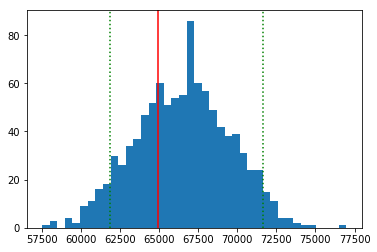

In [115]:
iqr = stats.iqr(resamples, rng=(5, 95) )

resample_mean = np.mean(resamples)

plt.hist(resamples, bins=40);
plt.axvline(true_mean, color='r')
plt.axvline(sample_mean-iqr/2.0, color='g', linestyle=':')
plt.axvline(sample_mean+iqr/2.0, color='g', linestyle=':')
plt.show()


## Graphics to show normality or otherwise of data



Show a normally distributed data set

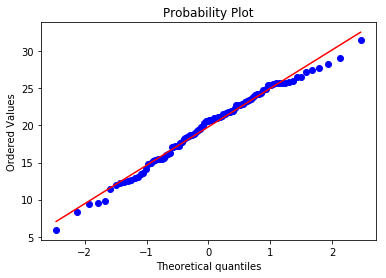

In [116]:
measurements = np.random.normal(loc = 20, scale = 5, size=100)   
stats.probplot(measurements, dist="norm", plot=plt)
plt.show()

Show our income data.

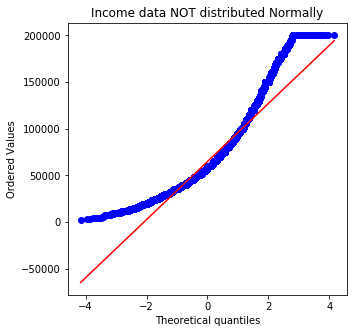

In [117]:
fig, ax = plt.subplots( figsize=(5, 5))

stats.probplot(income_trunc, dist="norm", plot=ax)
ax.set_title("Income data NOT distributed Normally")
plt.show()

In [118]:
stock2_df = pd.read_csv(PSDS_PATH+'sp500_px.csv')

In [119]:
netflix = stock2_df['NFLX']

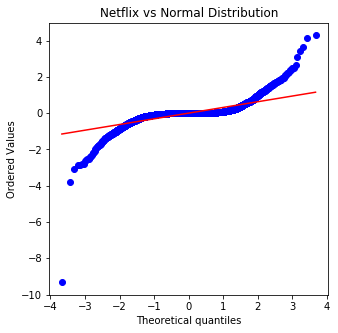

In [120]:
fig, ax = plt.subplots( figsize=(5, 5))

stats.probplot(netflix, dist="norm", plot=ax)
ax.set_title("Netflix vs Normal Distribution")
plt.show()

Show the Student T distribution

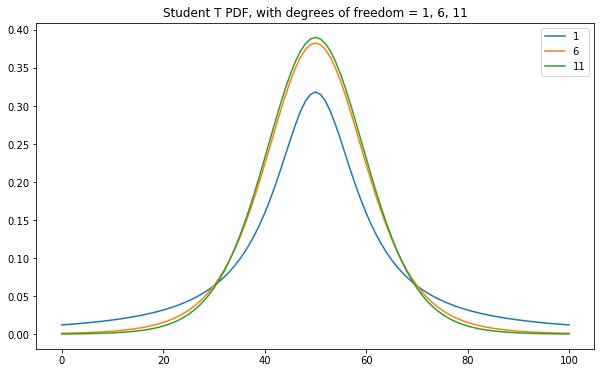

In [121]:
fig, ax = plt.subplots(figsize=(10,6))

my_list = []

for df in range(0,3):
 
    label = str(df*5+1)
    my_list.append(label)
    pdf = [stats.t.pdf(x/10.0, df*5+1, loc=5) for x in range(0,101)]
    plt.plot(pdf, linestyle='-')
#end for
plt.legend(my_list)
ax.set_title('Student T PDF, with degrees of freedom = 1, 6, 11')
plt.show()


---
## Resampling for A/B Testing

In [64]:
session_df = pd.read_csv(PSDS_PATH+'web_page_data.csv')

In [65]:
session_df.head()

,Page,Time
0,Page A,0.21
1,Page B,2.53
2,Page A,0.35
3,Page B,0.71
4,Page A,0.67


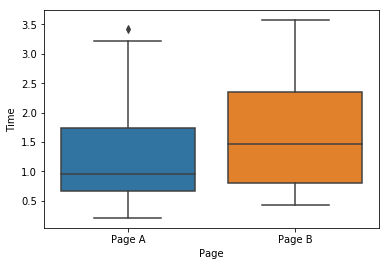

In [66]:
sn.boxplot(x='Page', y='Time', data=session_df)

In [67]:
page_a = session_df[session_df['Page']=='Page A']

In [68]:
page_b = session_df[session_df['Page']=='Page B']

In [69]:
print( page_a['Time'].mean(), page_b['Time'].mean())

1.263333333333333 1.62


In [70]:
session_df.shape


(36, 2)

In [71]:
print(page_a.shape)
print(page_b.shape)

(21, 2)
(15, 2)


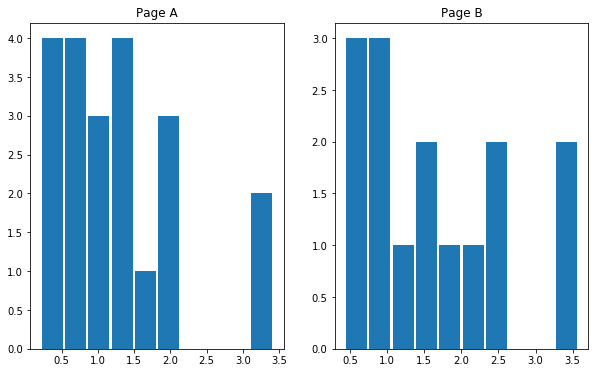

In [72]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))

ax[0].hist(page_a['Time'], bins=10, rwidth=0.9)
ax[0].set_title('Page A')

ax[1].hist(page_b['Time'], bins=10, rwidth=0.9)
ax[1].set_title('Page B')


plt.show()

In [73]:
sess_diffs = []
times = session_df['Time'].copy()
times.head()

0    0.21
1    2.53
2    0.35
3    0.71
4    0.67
Name: Time, dtype: float64

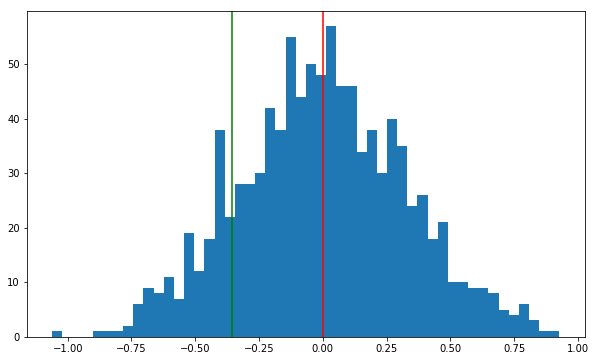

In [74]:
delta = []

for i in range(0,1000):
    np.random.shuffle(times)

    part_a = times[0:21].copy()
    part_b = times[21:].copy()
    a_avg = np.mean(part_a)
    b_avg = np.mean(part_b)
    delta.append(a_avg - b_avg)

#end for
fig, ax = plt.subplots( figsize=(10,6))
plt.hist(delta, bins=50)
ax.axvline(x=0.0, color='r')
ax.axvline(x = (page_a['Time'].mean()-page_b['Time'].mean() ), color='g'  )
plt.show()

Now try t test to determine if Page A and Page B difference could happen by chance

In [75]:
stats.ttest_ind(page_a['Time'], page_b['Time'])

Ttest_indResult(statistic=-1.1237042154424823, pvalue=0.26901024363926024)

---
### Two x Two Contingency tables

In [10]:
total = 23539 + 22406 + 200 + 182

In [11]:
hits = 200+182

In [12]:
prob = hits/ total


In [13]:
print(total, hits, prob)

46327 382 0.008245731430915016


In [14]:
mu = prob*total

In [15]:
sigma = np.sqrt(total * prob * (1.0-prob))

In [16]:
print(mu, sigma)

381.99999999999994 19.464072816175715


In [34]:
frac1 = (200.0/(200+23539))/np.sqrt((200+23539)*prob*(1.0-prob))
frac2 = (182.0/(182+22406))/np.sqrt((182+22406)*prob*(1.0-prob))
print(frac1, frac2)

0.0006046718252649716 0.0005928408038599885


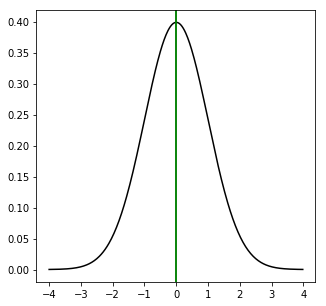

In [36]:
xn = np.array(range(-400,400, 2))/100.0
norms = [stats.norm.pdf(x, scale=1) for x in xn]

fig, ax = plt.subplots( figsize=(5, 5))
plt.plot(xn, norms, linestyle='-', marker='', color='k')
ax.axvline(frac1, color='g')
ax.axvline(frac2, color='g')


In [39]:
stats.fisher_exact([ [200, 182], [23539, 22406]], alternative='greater')

(1.0460078177483334, 0.3499380979316074)

In [40]:
stats.chi2_contingency([ [200, 182], [23539, 22406]])

(0.14893055235461503,
 0.6995594627146615,
 1,
 array([[  195.74541844,   186.25458156],
        [23543.25458156, 22401.74541844]]))

In [53]:
frac1 = (200.0/(200+23539))
frac2 = (182.0/(182+22406))
print(frac1, frac2)

0.008424954715868403 0.008057375597662475


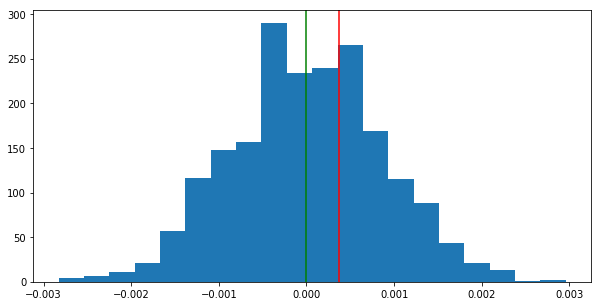

In [62]:
run = np.zeros(45_945+382)
run[0:382] = 1
diffs = []
for count in range(0,2000):
    np.random.shuffle(run)
    s1 = run[0:23_739].mean()
    s2 = run[23_739:].mean()

    diff = (s1 - s2)
    diffs.append(diff)
#end for

fig, ax = plt.subplots( figsize=(10, 5))
plt.hist(diffs, bins=20);
ax.axvline(0.0, color='g')
ax.axvline(frac1-frac2, color='r')

---
## ANOVA

In [6]:
stick_df = pd.read_csv(PSDS_PATH+'four_sessions.csv')

In [7]:
stick_df.head()


,Page,Time
0,Page 1,164
1,Page 2,178
2,Page 3,175
3,Page 4,155
4,Page 1,172


In [8]:
stick_df.describe()

,Time
count,20.000000
mean,173.900000
std,11.355036
min,155.000000
25%,165.500000
50%,173.500000
75%,179.000000
max,195.000000


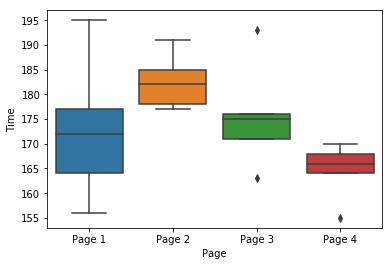

In [9]:
sn.boxplot(x='Page', y = 'Time', data=stick_df)

In [10]:
p1 = stick_df[stick_df['Page']=='Page 1']['Time']
p2 = stick_df[stick_df['Page']=='Page 2']['Time']
p3 = stick_df[stick_df['Page']=='Page 3']['Time']
p4 = stick_df[stick_df['Page']=='Page 4']['Time']
stats.f_oneway(p1, p2, p3, p4)

F_onewayResult(statistic=2.739825341901467, pvalue=0.0775862152580146)

### CHI2 test $\{ \chi^2 \}$

In [11]:
click = [14, 8, 12]
no_click = [986, 992, 988]

table = np.array([click, no_click])

stats.chi2_contingency(table)


(1.6659394708658917,
 0.4347562562343731,
 2,
 array([[ 11.33333333,  11.33333333,  11.33333333],
        [988.66666667, 988.66666667, 988.66666667]]))

In [19]:
ex_click =  [ 11.33333333,  11.33333333,  11.33333333]
ex_noclick = [988.66666667, 988.66666667, 988.66666667]

pr_click = []
pr_noclick = []
chi_stat = 0
for i in range(0,3):
    pr1 = (click[i]-ex_click[i])/np.sqrt(ex_click[i])
    pr_click.append(pr1)
    pr2 = (no_click[i]-ex_noclick[i])/np.sqrt(ex_noclick[i])
    pr_noclick.append(pr2)
    chi_stat = chi_stat + pr1*pr1+ pr2*pr2
#end for
print(pr_click)
print(pr_noclick)
print(chi_stat)

[0.7921180354879749, -0.9901475421321368, 0.1980295096146043]
[-0.08480936018336575, 0.10601169999067797, -0.02120234012535118]
1.6659394713502576


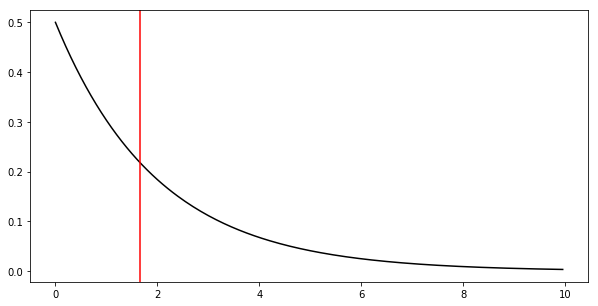

In [23]:
x_chi = np.array(range(0,200))/20.0
y = [stats.chi2.pdf(x, df=2) for x in x_chi]

fig, ax = plt.subplots( figsize=(10, 5))
plt.plot(x_chi, y, linestyle='-', color='k')
ax.axvline(chi_stat, color='r')

### Bootstrap (resampling) approach to test of significance

In [51]:
box = np.zeros(3000)
box[0:34] = np.ones(34)

In [54]:
def pearson(obs, expd):
    '''
    compute Pearson residual for a 2 row set of observations
    
    '''
    resid = 0.0
    for row, erow in zip(obs, expd):
        for col, ecol in zip(row, erow):
            resid = resid + (col-ecol)*(col-ecol)/ecol
        #end for
    #end for
    return resid
#end def

print(pearson([[14,8,12],[986,992,988]],[[11.33, 11.33, 11.33], [988.67, 988.67, 988.67]]) )
            

1.666426954553074


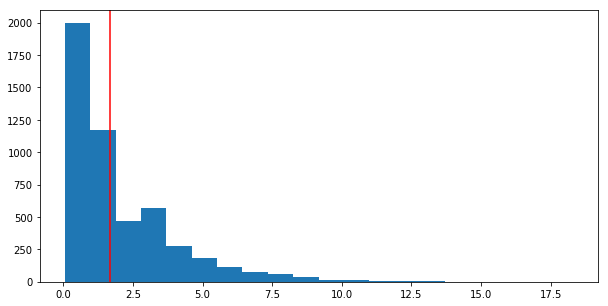

In [60]:
resids = []
expd = [[11.33, 11.33, 11.33], [988.67, 988.67, 988.67]]
for i in range(5000):
    np.random.shuffle(box)
    x1 = np.sum(box[0:1000])
    y1 = 1000 - x1
    x2 = np.sum(box[1000:2000])
    y2 = 1000 - x2
    x3 = np.sum(box[2000:])
    y3 = 1000 - x3
    rr = pearson([[x1, x2, x3],[y1, y2, y3]], expd)
    resids.append(rr)
#end for

fig, ax = plt.subplots( figsize=(10, 5))
plt.hist(resids, bins=20)
ax.axvline(1.666, color='r')

---
## Linear Regression

## Read data

In [6]:
lung_df = pd.read_csv(PSDS_PATH+'LungDisease.csv')

In [7]:
lung_df.head()


,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


In [8]:
lung_df.tail()


,PEFR,Exposure
117,450,22
118,490,22
119,500,22
120,370,23
121,390,23


### Use a Linear Regression Model from scipy.stats package

In [32]:
result = stats.linregress(lung_df['Exposure'], y=lung_df['PEFR'])

In [33]:
print(result.rvalue*result.rvalue)

0.07674102286283395


In [34]:
result

LinregressResult(slope=-4.1845764854614425, intercept=424.582806573957, rvalue=-0.2770217010684072, pvalue=0.002008352033351012, stderr=1.3249786033923678)

### Use a linear model from sklearn.linear_model

In [26]:
lm_lung = lm.LinearRegression()

lm_lung.fit(lung_df['Exposure'].values.reshape(122,1), lung_df['PEFR'])
print(lm_lung.get_params())
print(lm_lung.score(lung_df['Exposure'].values.reshape(122,1), lung_df['PEFR']))

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}
0.0767410228628338


In [35]:
print(lm_lung.coef_, lm_lung.intercept_)

[-4.18457649] 424.582806573957


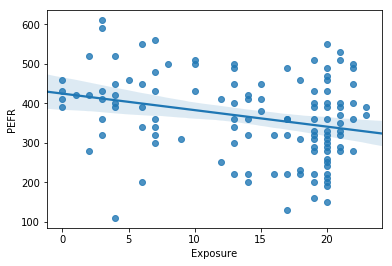

In [40]:
sn.regplot(x='Exposure', y='PEFR', data =lung_df)

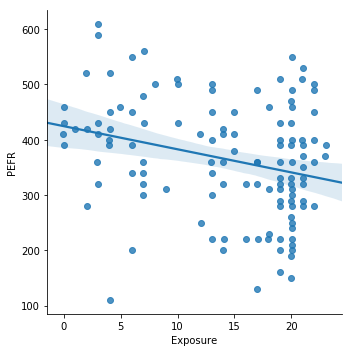

In [39]:
sn.lmplot(x='Exposure', y='PEFR', data =lung_df, x_jitter=0.05)

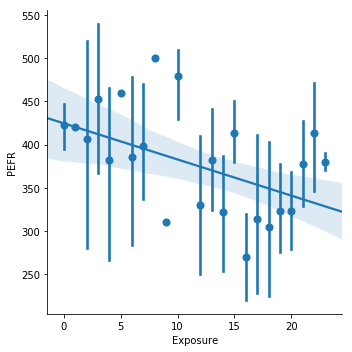

In [41]:
sn.lmplot(x='Exposure', y='PEFR', data =lung_df, x_estimator=np.mean)

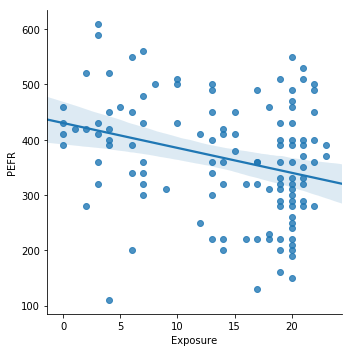

In [43]:
sn.lmplot(x='Exposure', y='PEFR', data =lung_df, robust=True)

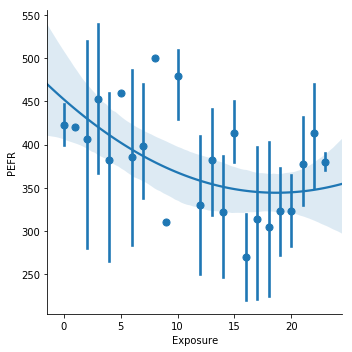

In [48]:
sn.lmplot(x='Exposure', y='PEFR', data =lung_df, order=2, x_estimator=np.mean)

## Using statsmodels package

In [49]:
import statsmodels.api as sm

D:\Anaconda3\envs\root36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [50]:
endog = lung_df['PEFR']
exog = lung_df['Exposure'].values.reshape(122,1)
exog_c = sm.add_constant(exog)

est = sm.OLS(endog, exog_c)
est2 = est.fit()

print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Sat, 24 Mar 2018   Prob (F-statistic):            0.00201
Time:                        18:22:18   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.5828     20.796     20.417      0.0

---
## Multivariate regression

### Read data of house sale prices

In [6]:
house_df = pd.read_csv(PSDS_PATH+'house_sales.csv',sep='\t')

In [7]:
house_df.head()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
1,2014-09-16,280000,1000102,Multiplex,2014-09-01,405100,0.930836,300805.0,2,9373,...,3.00,6,7,1991,0,0,70000,229000,98002,False
2,2006-06-16,1000000,1200013,Single Family,2006-06-01,404400,0.929228,1076162.0,1,20156,...,3.75,4,10,2005,0,0,203000,590000,98166,True
3,2007-01-29,745000,1200019,Single Family,2007-01-01,425600,0.977941,761805.0,1,26036,...,1.75,4,8,1947,0,0,183000,275000,98166,False
4,2008-02-25,425000,2800016,Single Family,2008-02-01,418400,0.961397,442065.0,1,8618,...,3.75,5,7,1966,0,0,104000,229000,98168,False
5,2013-03-29,240000,2800024,Single Family,2013-03-01,351600,0.807904,297065.0,1,8620,...,1.75,4,7,1948,0,0,104000,205000,98168,False


In [9]:
house_df.tail()

,DocumentDate,SalePrice,PropertyID,PropertyType,ym,zhvi_px,zhvi_idx,AdjSalePrice,NbrLivingUnits,SqFtLot,...,Bathrooms,Bedrooms,BldgGrade,YrBuilt,YrRenovated,TrafficNoise,LandVal,ImpsVal,ZipCode,NewConstruction
27057,2011-04-08,325000,9842300710,Single Family,2011-04-01,318700,0.732307,443803.0,1,5468,...,1.75,3,7,1951,0,0,201000,172000,98126,False
27058,2007-09-28,1580000,9845500010,Single Family,2007-09-01,433500,0.996094,1586196.0,1,23914,...,4.50,4,11,2000,0,1,703000,951000,98040,False
27061,2012-07-09,165000,9899200010,Single Family,2012-07-01,325300,0.747472,220744.0,1,11170,...,1.00,4,6,1971,0,0,92000,130000,98055,False
27062,2006-05-26,315000,9900000355,Single Family,2006-05-01,400600,0.920496,342207.0,1,6223,...,2.00,3,7,1939,0,0,103000,212000,98166,False
27063,2007-01-09,465000,9906000035,Single Family,2007-01-01,425600,0.977941,475489.0,1,4400,...,1.50,3,7,1928,0,0,311000,268000,98103,False


### Extract variables of interest (exogenous drives of sale price)

In [11]:
house_df[['AdjSalePrice', 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']].head()

,AdjSalePrice,SqFtTotLiving,SqFtLot,Bathrooms,Bedrooms,BldgGrade
1,300805.0,2400,9373,3.00,6,7
2,1076162.0,3764,20156,3.75,4,10
3,761805.0,2060,26036,1.75,4,8
4,442065.0,3200,8618,3.75,5,7
5,297065.0,1720,8620,1.75,4,7


In [12]:
exog = house_df[[ 'SqFtTotLiving', 'SqFtLot', 'Bathrooms', 'Bedrooms', 'BldgGrade']]

### Use sklearn linear model for first regression

In [13]:
lm_house = lm.LinearRegression()

lm_house.fit(exog, house_df['AdjSalePrice'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(lm_house.coef_, lm_house.intercept_)

[ 2.28832107e+02 -6.05060092e-02 -1.94380990e+04 -4.77811534e+04
  1.06117210e+05] -521924.72203797183


In [15]:
lm_house.score(exog, house_df['AdjSalePrice'])

0.5406641508395744

### Use OLS from statsmodels

In [18]:
exog_c = sm.add_constant(exog)

ex = sm.OLS(house_df['AdjSalePrice'], exog_c)

In [20]:
ex2 = ex.fit()
print(ex2.summary())

                            OLS Regression Results                            
Dep. Variable:           AdjSalePrice   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     5340.
Date:                Sun, 25 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:48:37   Log-Likelihood:            -3.1520e+05
No. Observations:               22689   AIC:                         6.304e+05
Df Residuals:                   22683   BIC:                         6.305e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.219e+05   1.57e+04    -33.349

In [21]:
ex2

In [12]:
house_df.columns

Index(['DocumentDate', 'SalePrice', 'PropertyID', 'PropertyType', 'ym',
       'zhvi_px', 'zhvi_idx', 'AdjSalePrice', 'NbrLivingUnits', 'SqFtLot',
       'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms',
       'BldgGrade', 'YrBuilt', 'YrRenovated', 'TrafficNoise', 'LandVal',
       'ImpsVal', 'ZipCode', 'NewConstruction'],
      dtype='object')

In [14]:
house2_df = house_df[['AdjSalePrice', 'NbrLivingUnits', 'SqFtLot', 'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade']]

In [15]:
house2_mx = house2_df.as_matrix()

In [16]:
house2_mx

array([[3.008050e+05, 2.000000e+00, 9.373000e+03, ..., 3.000000e+00,
        6.000000e+00, 7.000000e+00],
       [1.076162e+06, 1.000000e+00, 2.015600e+04, ..., 3.750000e+00,
        4.000000e+00, 1.000000e+01],
       [7.618050e+05, 1.000000e+00, 2.603600e+04, ..., 1.750000e+00,
        4.000000e+00, 8.000000e+00],
       ...,
       [2.207440e+05, 1.000000e+00, 1.117000e+04, ..., 1.000000e+00,
        4.000000e+00, 6.000000e+00],
       [3.422070e+05, 1.000000e+00, 6.223000e+03, ..., 2.000000e+00,
        3.000000e+00, 7.000000e+00],
       [4.754890e+05, 1.000000e+00, 4.400000e+03, ..., 1.500000e+00,
        3.000000e+00, 7.000000e+00]])

In [17]:
cmatrix = np.corrcoef(house2_mx, rowvar=False)

In [18]:
cmatrix


array([[ 1.        ,  0.02253975,  0.1371434 ,  0.69518331,  0.29759345,
         0.52918922,  0.31201962,  0.67562503],
       [ 0.02253975,  1.        , -0.00511272,  0.05956325,  0.06680276,
         0.1112267 ,  0.16807611, -0.04809456],
       [ 0.1371434 , -0.00511272,  1.        ,  0.19595034,  0.03542122,
         0.10743616,  0.06907573,  0.14550115],
       [ 0.69518331,  0.05956325,  0.19595034,  1.        ,  0.40712746,
         0.76418639,  0.60028843,  0.77049281],
       [ 0.29759345,  0.06680276,  0.03542122,  0.40712746,  1.        ,
         0.27268392,  0.31240478,  0.13757022],
       [ 0.52918922,  0.1112267 ,  0.10743616,  0.76418639,  0.27268392,
         1.        ,  0.53795291,  0.65877182],
       [ 0.31201962,  0.16807611,  0.06907573,  0.60028843,  0.31240478,
         0.53795291,  1.        ,  0.36799455],
       [ 0.67562503, -0.04809456,  0.14550115,  0.77049281,  0.13757022,
         0.65877182,  0.36799455,  1.        ]])

In [20]:
np.set_printoptions(precision=4)

In [21]:
cmatrix

array([[ 1.    ,  0.0225,  0.1371,  0.6952,  0.2976,  0.5292,  0.312 ,
         0.6756],
       [ 0.0225,  1.    , -0.0051,  0.0596,  0.0668,  0.1112,  0.1681,
        -0.0481],
       [ 0.1371, -0.0051,  1.    ,  0.196 ,  0.0354,  0.1074,  0.0691,
         0.1455],
       [ 0.6952,  0.0596,  0.196 ,  1.    ,  0.4071,  0.7642,  0.6003,
         0.7705],
       [ 0.2976,  0.0668,  0.0354,  0.4071,  1.    ,  0.2727,  0.3124,
         0.1376],
       [ 0.5292,  0.1112,  0.1074,  0.7642,  0.2727,  1.    ,  0.538 ,
         0.6588],
       [ 0.312 ,  0.1681,  0.0691,  0.6003,  0.3124,  0.538 ,  1.    ,
         0.368 ],
       [ 0.6756, -0.0481,  0.1455,  0.7705,  0.1376,  0.6588,  0.368 ,
         1.    ]])

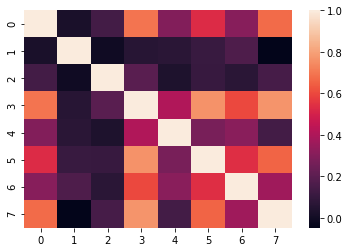

In [22]:
sn.heatmap(cmatrix)

In [23]:
new_df = pd.DataFrame(data=cmatrix, columns=['AdjSalePrice', 'NbrLivingUnits', 'SqFtLot', 'SqFtTotLiving', 'SqFtFinBasement', 'Bathrooms', 'Bedrooms', 'BldgGrade'])

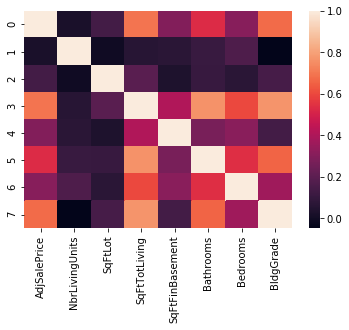

In [24]:
sn.heatmap(new_df)

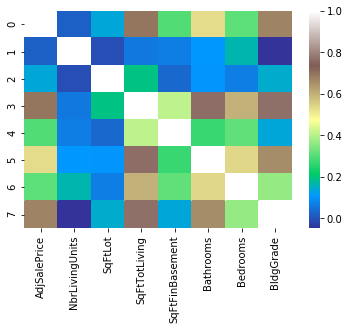

In [25]:
sn.heatmap(new_df, cmap='terrain')

In [33]:
hcorr = house2_df.corr()
print(hcorr)

                 AdjSalePrice  NbrLivingUnits   SqFtLot  SqFtTotLiving  \
AdjSalePrice         1.000000        0.022540  0.137143       0.695183   
NbrLivingUnits       0.022540        1.000000 -0.005113       0.059563   
SqFtLot              0.137143       -0.005113  1.000000       0.195950   
SqFtTotLiving        0.695183        0.059563  0.195950       1.000000   
SqFtFinBasement      0.297593        0.066803  0.035421       0.407127   
Bathrooms            0.529189        0.111227  0.107436       0.764186   
Bedrooms             0.312020        0.168076  0.069076       0.600288   
BldgGrade            0.675625       -0.048095  0.145501       0.770493   

                 SqFtFinBasement  Bathrooms  Bedrooms  BldgGrade  
AdjSalePrice            0.297593   0.529189  0.312020   0.675625  
NbrLivingUnits          0.066803   0.111227  0.168076  -0.048095  
SqFtLot                 0.035421   0.107436  0.069076   0.145501  
SqFtTotLiving           0.407127   0.764186  0.600288   0.770493 

In [34]:
ix = hcorr.sort_values('AdjSalePrice', ascending=False).index
hcorr2 = hcorr.loc[ix,ix]

In [35]:
hcorr2


,AdjSalePrice,SqFtTotLiving,BldgGrade,Bathrooms,Bedrooms,SqFtFinBasement,SqFtLot,NbrLivingUnits
AdjSalePrice,1.000000,0.695183,0.675625,0.529189,0.312020,0.297593,0.137143,0.022540
SqFtTotLiving,0.695183,1.000000,0.770493,0.764186,0.600288,0.407127,0.195950,0.059563
BldgGrade,0.675625,0.770493,1.000000,0.658772,0.367995,0.137570,0.145501,-0.048095
Bathrooms,0.529189,0.764186,0.658772,1.000000,0.537953,0.272684,0.107436,0.111227
Bedrooms,0.312020,0.600288,0.367995,0.537953,1.000000,0.312405,0.069076,0.168076
SqFtFinBasement,0.297593,0.407127,0.137570,0.272684,0.312405,1.000000,0.035421,0.066803
SqFtLot,0.137143,0.195950,0.145501,0.107436,0.069076,0.035421,1.000000,-0.005113
NbrLivingUnits,0.022540,0.059563,-0.048095,0.111227,0.168076,0.066803,-0.005113,1.000000


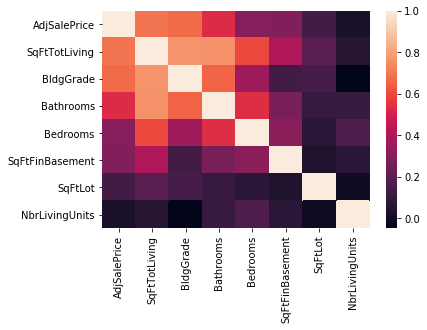

In [36]:
sn.heatmap(hcorr2)